# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# url = "https://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = f"{url}&appid={weather_api_key}&units=imperial&q={city}"
#     city_weather = requests.get(f"{city_url}").json()
#     pprint(city_weather)

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f"{city_url}").json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | freetown
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | pangkalanbuun
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | sam roi yot
Processing Record 20 of Set 1 | tashtagol
Processing Record 21 of Set 1 | basco
Processing Record 22 of Set 1 | novay

Processing Record 41 of Set 4 | papatowai
Processing Record 42 of Set 4 | acajutla
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | damara
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | hihifo
City not found. Skipping...
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | merizo village
Processing Record 49 of Set 4 | rawson
Processing Record 0 of Set 5 | xining
Processing Record 1 of Set 5 | trincomalee
Processing Record 2 of Set 5 | xai-xai
Processing Record 3 of Set 5 | okhotsk
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | shalya
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | novoazovs'k
Processing Record 8 of Set 5 | kone
Processing Record 9 of Set 5 | whitehorse
Processing Record 10 of Set 5 | lata
Processing Record 11 of Set 5 | pasargad
City not found. Skipping...
Processing Record 12 of Set 5 | san antonio de pale
Processing Record 13 of Set 5 | c

Processing Record 33 of Set 8 | caleta de carquin
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | ust-tsilma
Processing Record 36 of Set 8 | dzagam
Processing Record 37 of Set 8 | kedrovyy
Processing Record 38 of Set 8 | tshabong
Processing Record 39 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 40 of Set 8 | chirilagua
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | maba
Processing Record 43 of Set 8 | sevlievo
Processing Record 44 of Set 8 | streetsboro
Processing Record 45 of Set 8 | east ballina
Processing Record 46 of Set 8 | goz beida
Processing Record 47 of Set 8 | mirnyy
Processing Record 48 of Set 8 | san jose village
City not found. Skipping...
Processing Record 49 of Set 8 | lamar
Processing Record 0 of Set 9 | grand falls-windsor
Processing Record 1 of Set 9 | dok kham tai
Processing Record 2 of Set 9 | magong
Processing Record 3 of Set 9 | port blair
Processing Record 4 of Set 9 | samana
Processing Rec

Processing Record 22 of Set 12 | saint george
Processing Record 23 of Set 12 | batticaloa
Processing Record 24 of Set 12 | bonyhad
Processing Record 25 of Set 12 | eureka
Processing Record 26 of Set 12 | taulaga
Processing Record 27 of Set 12 | horta
Processing Record 28 of Set 12 | malango
Processing Record 29 of Set 12 | great falls
Processing Record 30 of Set 12 | hammerfest
Processing Record 31 of Set 12 | huambo
Processing Record 32 of Set 12 | esmeraldas
Processing Record 33 of Set 12 | chita
Processing Record 34 of Set 12 | barcelos
Processing Record 35 of Set 12 | fort st. john
Processing Record 36 of Set 12 | hovd
Processing Record 37 of Set 12 | paita
Processing Record 38 of Set 12 | raton
Processing Record 39 of Set 12 | jinchang
Processing Record 40 of Set 12 | yaren
Processing Record 41 of Set 12 | kayangel
Processing Record 42 of Set 12 | maintirano
Processing Record 43 of Set 12 | belmonte
Processing Record 44 of Set 12 | tago
-----------------------------
Data Retrieval

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,freetown,8.4840,-13.2299,26.93,80,99,2.76,SL,1684609392
1,puerto natales,-51.7236,-72.4875,10.25,57,40,5.14,CL,1684609293
2,port-aux-francais,-49.3500,70.2167,4.04,65,93,8.18,TF,1684609280
3,east london,-33.0153,27.9116,13.52,76,0,2.06,ZA,1684609313
4,albany,42.6001,-73.9662,19.46,81,100,1.34,US,1684609180


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,freetown,8.4840,-13.2299,26.93,80,99,2.76,SL,1684609392
1,puerto natales,-51.7236,-72.4875,10.25,57,40,5.14,CL,1684609293
2,port-aux-francais,-49.3500,70.2167,4.04,65,93,8.18,TF,1684609280
3,east london,-33.0153,27.9116,13.52,76,0,2.06,ZA,1684609313
4,albany,42.6001,-73.9662,19.46,81,100,1.34,US,1684609180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

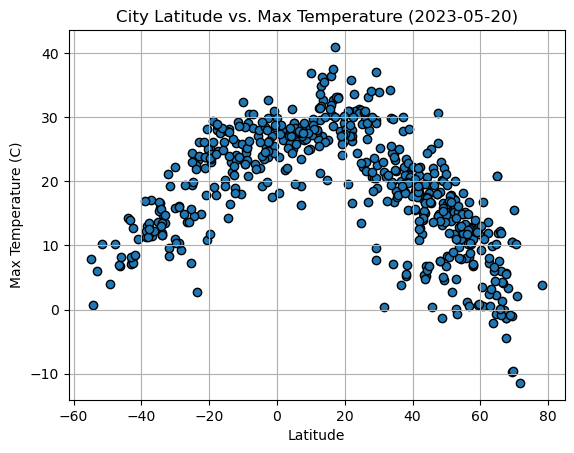

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2023-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(x_lat, y_temp, edgecolors='black')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

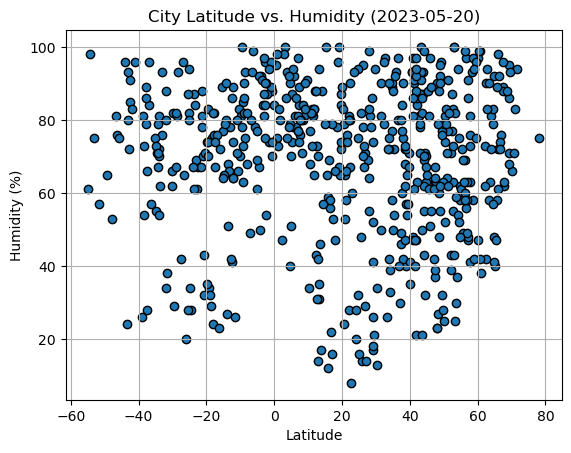

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_hum = city_data_df['Humidity']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2023-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_lat, y_hum, edgecolors='black')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

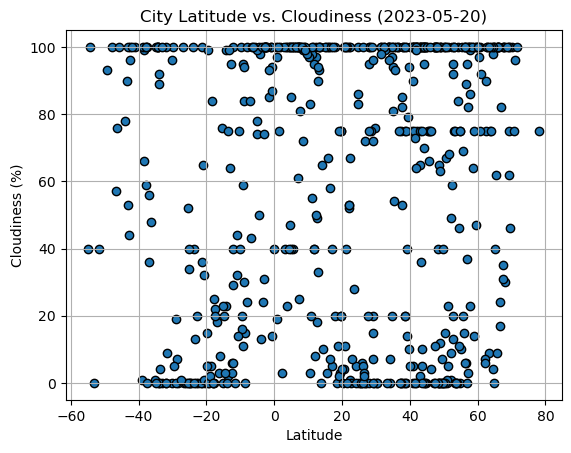

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
y_cloud = city_data_df["Cloudiness"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2023-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_lat, y_cloud, edgecolors='black')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

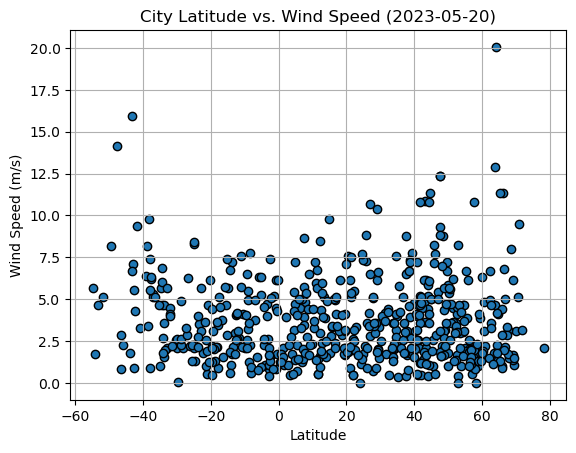

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y_wind = city_data_df["Wind Speed"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2023-05-20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(x_lat, y_wind, edgecolors='black')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_value, y_value, text_location, size):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value*slope + intercept
    correlation = st.pearsonr(x_value, y_value)
    print(f"The r-value is: {round(correlation[0],2)}")
    line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, c="red")
    plt.annotate(line, text_location, fontsize = size, color = 'red')
    plt.show()
    return plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,freetown,8.4840,-13.2299,26.93,80,99,2.76,SL,1684609392
4,albany,42.6001,-73.9662,19.46,81,100,1.34,US,1684609180
5,enewetak,11.3474,162.3373,27.78,81,100,6.76,MH,1684609292
9,stanley,54.8680,-1.6985,14.88,62,0,2.06,GB,1684609295
10,kodiak,57.7900,-152.4072,6.73,81,100,10.80,US,1684609291


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,10.25,57,40,5.14,CL,1684609293
2,port-aux-francais,-49.3500,70.2167,4.04,65,93,8.18,TF,1684609280
3,east london,-33.0153,27.9116,13.52,76,0,2.06,ZA,1684609313
6,pangkalanbuun,-2.6833,111.6167,23.78,96,100,0.85,ID,1684609516
7,adamstown,-25.0660,-130.1015,24.38,82,34,8.28,PN,1684609290


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.79


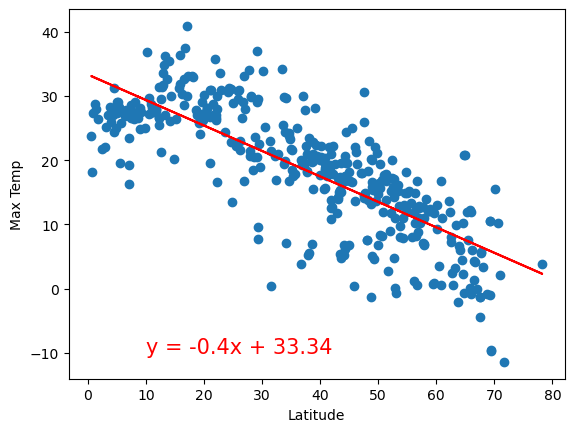

In [49]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
linear_regression(x, y, (10, -10), 15)

The r-value is: 0.81


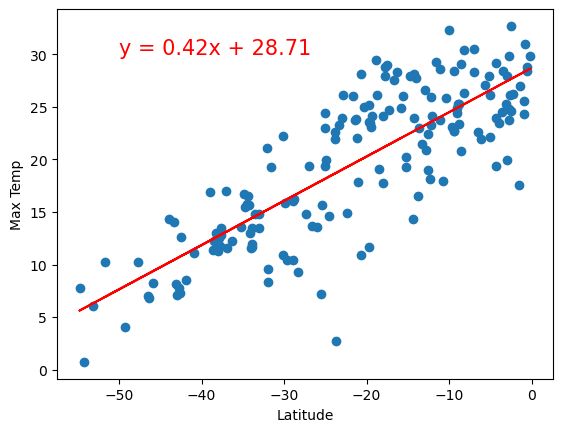

In [50]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
linear_regression(x, y, (-50, 30), 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0


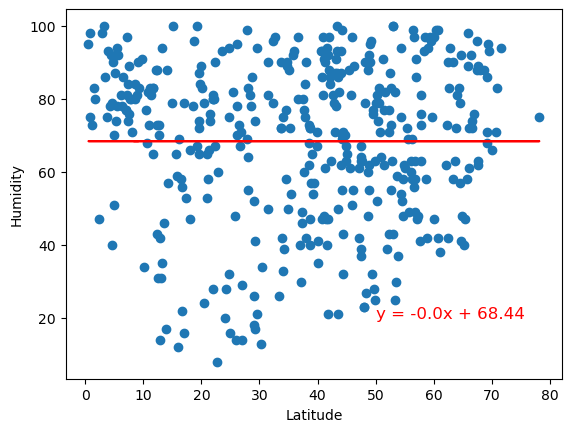

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x, y, (50, 20), 12)

The r-value is: 0.13


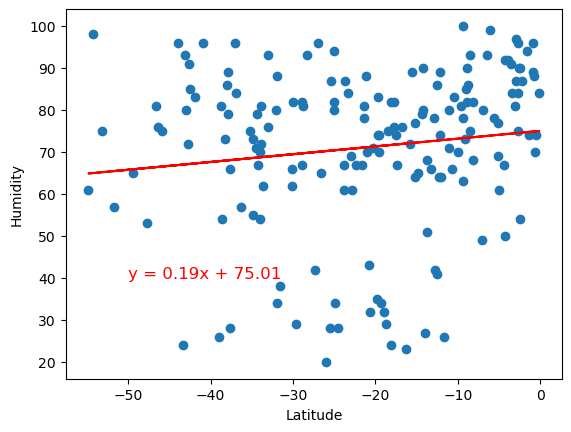

In [52]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x, y, (-50, 40), 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.01


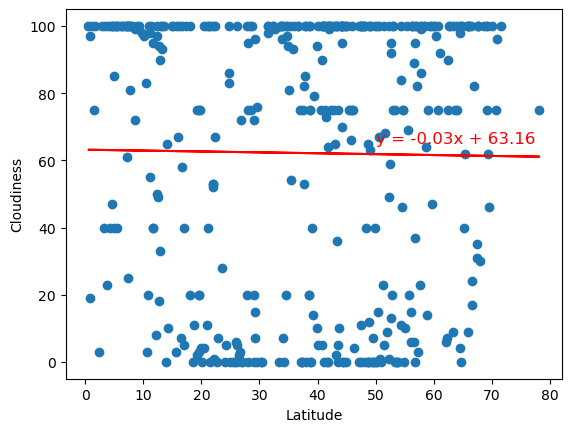

In [53]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x, y, (50, 65), 12)

The r-value is: 0.03


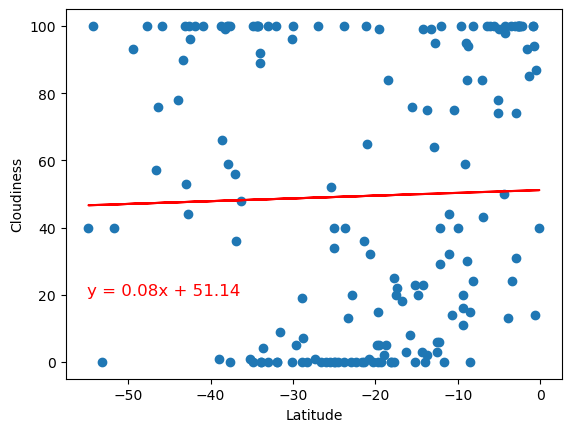

In [54]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x, y, (-55, 20), 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05


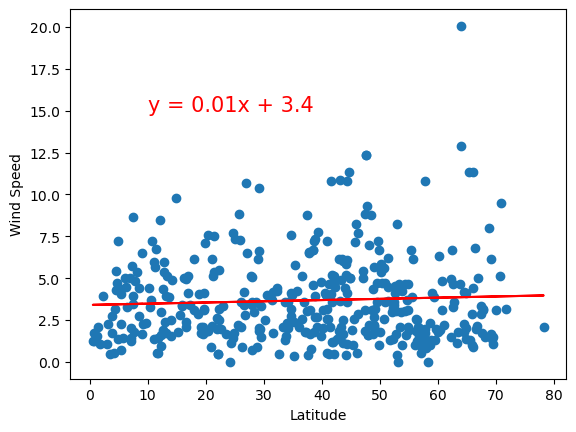

In [55]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x, y, (10, 15), 15)

The r-value is: -0.26


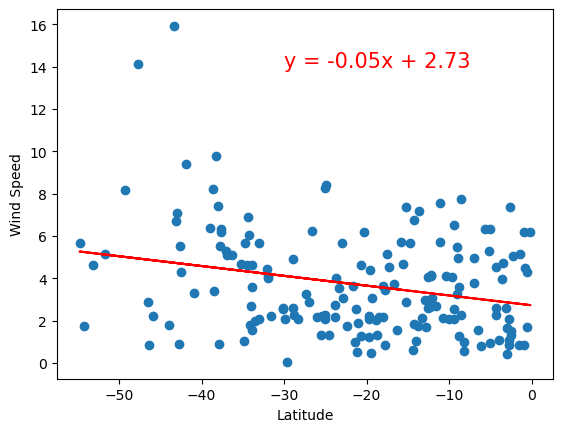

In [56]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x, y, (-30, 14), 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE